# Lead Scoring Case Study
By: Deepak Krishna A.R & Nicky Paul Eapen

***

#### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

This Case study aims to help X Education select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#### Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
#Display settings
pd.set_option('display.max_columns', None)

#### Loading Dataset 

In [4]:
# Upload to colab
# from google.colab import files
# uploaded = files.upload()

In [5]:
lead=pd.read_csv('Leads.csv')

In [6]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Data Inspection

In [7]:
#info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#Descriptive Statistics of numerical columns
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
#Descriptive Statistics of all columns
lead.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,0bc21b43-0ad4-4f10-ac8d-cfa72f6a54ba,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


**OBSERVATION**

- There are many categorical columns having rows as 'Select'. This is a default option seen in the drop down list when the user does not select any choice. Therefore, 'Select' can be treated as missing values and the columns can be handled accordingly.
- There are a few categorical columns with very low or no variance, These should be removed.

In [10]:
#Null value %
round(lead.isnull().mean()*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Value count of Categorical columns
C_cat=lead.select_dtypes(include='O').columns
for column in C_cat:
    print("\033[1m" + column + "\033[0m")
    print(lead[column].value_counts())
    print("\033[1m" + "Missing values(%):{0}".format(round(lead[column].isnull().mean()*100,2))  + "\033[0m")
    print('___________________________________________________')

Prospect ID
0bc21b43-0ad4-4f10-ac8d-cfa72f6a54ba    1
2bfc1235-0c81-4bc1-a24f-f89a564ec834    1
11bd3f67-c7bf-4814-a7b5-80b121f4658d    1
e476a031-6ffe-4645-b4f6-7f7db5be4567    1
7eabcddd-278f-4ff5-8015-2761a40ee8cb    1
                                       ..
c849b45f-5434-442c-85f4-43e7797e4557    1
5c31385a-070b-41a9-bc77-0d6f83b23749    1
e15f7790-df5b-4095-bfd3-2c2f67aac3cb    1
6674e691-e0cf-46bb-9397-5e813a1e7060    1
6c9522f8-878d-4840-897c-bacc0cd44905    1
Name: Prospect ID, Length: 9240, dtype: int64
Missing values(%):0.0
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Missing values(%):0.0
___________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference   

**OBSERVATION**: Upon inspection of data distribution of every columns, the following columns are to be removed for the stated reasons.

**CATEGORICAL COLUMNS TO BE REMOVED:** 
1. **Prospect ID**-Irrelevant
3. **Do not Call**- Very low variance
4. **Country**- More than 95% of leads are from India
5. **How did you hear about X Education**- High amount of missing values
6. **What matters most to you in choosing a course**-Low Variance
7. **Search**-Low Variance
8. **Magazine**-Low Variance
9. **Newspaper Article**-Low Variance
10. **X Education Forums**-Low Variance
11. **Newspaper**-Low Variance
12. **Digital Advertisement**-Low Variance
13. **Through Recommendations**-Low Variance
14. **Receive More Updates About Our Courses**-No variance
15. **Tags**-High amount of Missing Values
16. **Lead Quality**-More than 50% missing values
17. **Update me on Supply Chain Content**-No variance
18. **Get updates on DM content**-No variance
19. **Lead Profile**-High amount of Missing values
20. **City**-Missing values & Low relavance
21. **Asymmetrique Activity Index**-High amount of Missing values
22. **Asymmetrique Profile Index**-High amount of Missing values
23. **I agree to pay the amount through cheque**-No variance
    
**NUMERICAL COLUMNS**
1. **Asymmetrique Activity Score**-High amount of Missing values
2. **Asymmetrique Profile Score**-High amount of Missing values
    

#### Data Cleaning

In [12]:
#Categorical columns to be removed
lead.drop(['Prospect ID','Do Not Call','Country','How did you hear about X Education',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque'], axis=1, inplace=True)
       

In [13]:
#Numerical columns to be removed
lead.drop(['Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1, inplace=True)

In [14]:
#Updated info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          7802 non-null   object 
 10  What is your current occupation         6550 non-null   obje

In [15]:
#Null values
lead.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [16]:
#Removing the rows with null value in 'What is your current occupation' column
lead = lead[~pd.isnull(lead['What is your current occupation'])]

In [17]:
#Null values
lead.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [18]:
#Removing the rows with null value in 'TotalVisits' column
lead = lead[~pd.isnull(lead['TotalVisits'])]

In [19]:
#Null values
lead.isnull().sum()

Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [20]:
#Removing the rows with null value in 'Lead Source' column
lead = lead[~pd.isnull(lead['Lead Source'])]

In [21]:
#Null values
lead.isnull().sum()

Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [22]:
#Removing the rows with null value in 'Specialization' column
lead = lead[~pd.isnull(lead['Specialization'])]

In [23]:
#Null values
lead.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [24]:
# percentage of Data retained after Data Cleaning
print(len(lead.index)/9240)

0.6897186147186147


**OBSERVATION**

We are able to retain almost 70% of the data after cleaning.

In [25]:
#Shape
lead.shape

(6373, 13)

In [26]:
#info
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6373 non-null   int64  
 1   Lead Origin                             6373 non-null   object 
 2   Lead Source                             6373 non-null   object 
 3   Do Not Email                            6373 non-null   object 
 4   Converted                               6373 non-null   int64  
 5   TotalVisits                             6373 non-null   float64
 6   Total Time Spent on Website             6373 non-null   int64  
 7   Page Views Per Visit                    6373 non-null   float64
 8   Last Activity                           6373 non-null   object 
 9   Specialization                          6373 non-null   object 
 10  What is your current occupation         6373 non-null   obje

#### Outlier Analysis

In [27]:
#Inspecting the data distribution
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000
mean,616228.489408,0.480935,3.624196,535.224541,2.480464
std,23370.802615,0.499676,5.048555,565.374753,2.167364
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,595774.000000,0.000000,1.000000,34.000000,1.000000
50%,613732.000000,0.000000,3.000000,287.000000,2.000000
75%,637156.000000,1.000000,5.000000,1022.000000,3.500000
90%,649242.200000,1.000000,8.000000,1428.800000,5.000000
95%,655161.400000,1.000000,10.000000,1592.400000,6.000000
99%,659721.960000,1.000000,18.000000,1849.280000,9.000000


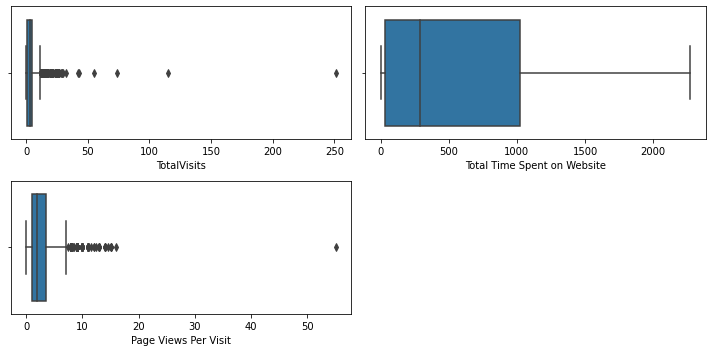

In [28]:
#Plotting Numerical Columns
#Setting figure size
plt.figure(figsize=[10,5])

# Total visits
plt.subplot(2,2,1)
sns.boxplot(lead.TotalVisits)

#Total Time Spent on websites
plt.subplot(2,2,2)
sns.boxplot(lead['Total Time Spent on Website'])

#Page Views per Visit
plt.subplot(2,2,3)
sns.boxplot(lead['Page Views Per Visit'])

plt.tight_layout()
plt.show()




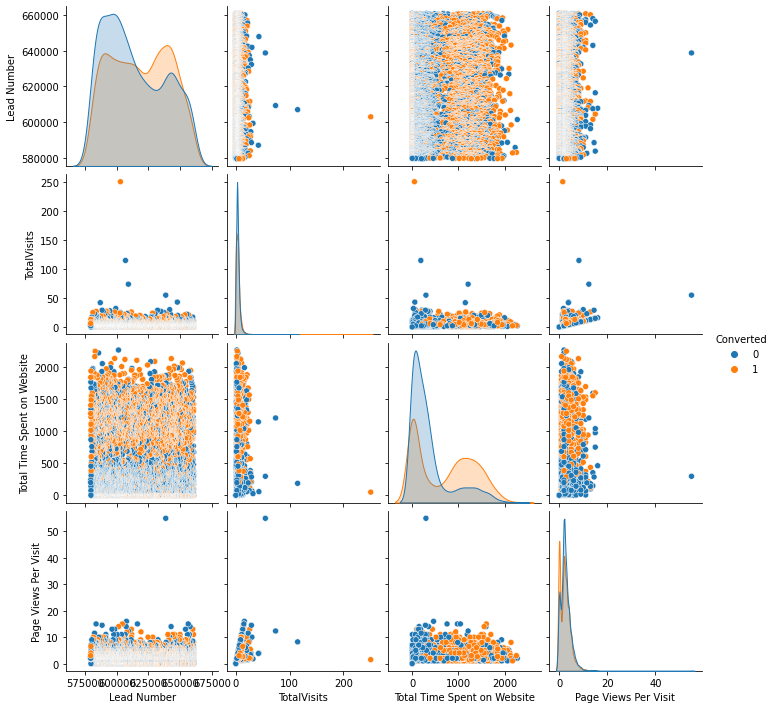

In [29]:
#Pairplot 
sns.pairplot(lead,diag_kind='kde',hue='Converted')
plt.show()

**OBSERVATION**

There are a few extreme outliers observed in the 'TotalVisits' and 'Page Views Per Visit' Column. These outliers are capped to the 99% quantile to correct the skewness of the Data.

In [30]:
#Capping at 0.99 quantile
U1=lead['TotalVisits'].quantile(0.99)
U2=lead['Page Views Per Visit'].quantile(0.99)
lead['TotalVisits'][lead['TotalVisits']>U1] = U1
lead['Page Views Per Visit'][lead['Page Views Per Visit']>U2] = U2

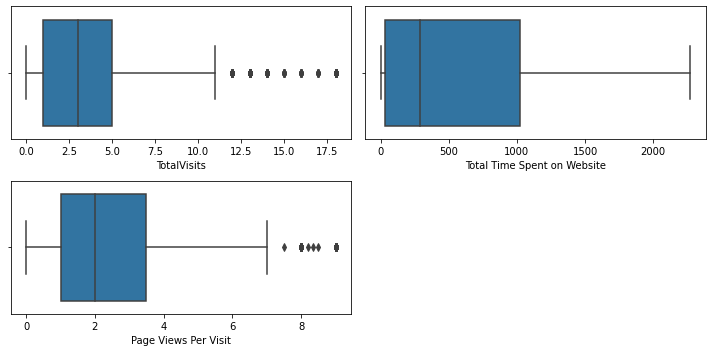

In [31]:
#Inspecting outliers after outlier treatment
plt.figure(figsize=[10,5])

#TotalVisits
plt.subplot(2,2,1)
sns.boxplot(lead.TotalVisits)

#Total Time Spent on Website
plt.subplot(2,2,2)
sns.boxplot(lead['Total Time Spent on Website'])

#Page Views Per Visit
plt.subplot(2,2,3)
sns.boxplot(lead['Page Views Per Visit'])

plt.tight_layout()
plt.show()

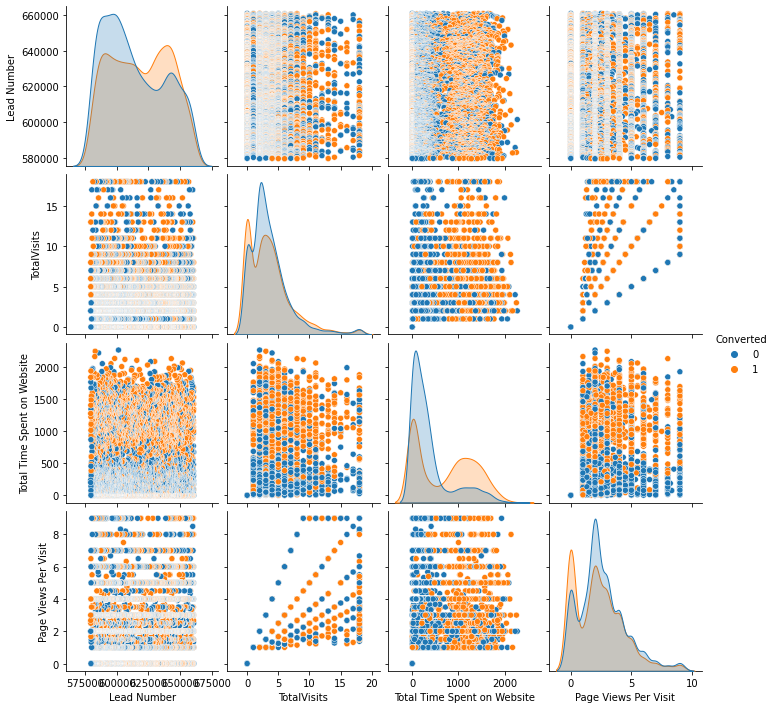

In [32]:
#Pairplot
sns.pairplot(lead,diag_kind='kde',hue='Converted')
plt.show()

#### Converting Binary Variables to 0 and 1

In [33]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [34]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


#### Dummy Variables 

In [35]:
#Converting categorical variables into dummy variables
d=pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity']],drop_first=True)


In [36]:
#Merging the new dummy variables to original df
lead=pd.concat([lead,d], axis=1)

- 'Specialization_Select' column is manually removed instead of using the 'drop_first' Feature, since the 'Select' values are actually missing values.  

In [37]:
#Dummy variables of specialization column
d_splz=pd.get_dummies(lead.Specialization, prefix= 'Specialization')
#Dropping the 'Specialization_Select' column
d_splz=d_splz.drop(['Specialization_Select'], axis=1)
#Merging with the original df
lead=pd.concat([lead,d_splz], axis=1)

In [38]:
lead.select_dtypes(include='O').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [39]:
#Dropping the original categorical variables 
lead=lead.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Last Notable Activity'],axis=1)

In [40]:
#Info
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           6373 non-null   int64  
 1   Do Not Email                                          6373 non-null   int64  
 2   Converted                                             6373 non-null   int64  
 3   TotalVisits                                           6373 non-null   float64
 4   Total Time Spent on Website                           6373 non-null   int64  
 5   Page Views Per Visit                                  6373 non-null   float64
 6   A free copy of Mastering The Interview                6373 non-null   int64  
 7   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 8   Lead Origin_Lead Add Form                             6373

#### Test Train Split 

In [41]:
#import Library
from sklearn.model_selection import train_test_split

In [42]:
#X axis variables
X=lead.drop(['Converted','Lead Number'], axis=1)

#Target Variable
y=lead.Converted

#Test Train split ( Splitting in 70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling Train Data

In [43]:
#Import MinMaxSxcaler
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler=MinMaxScaler()

In [45]:
#Scaling Numerical Variables
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])



In [46]:
#Descriptive Statistics
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000,4461.0,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461

In [47]:

X_train.shape

(4461, 92)

#### Checking for Correlation

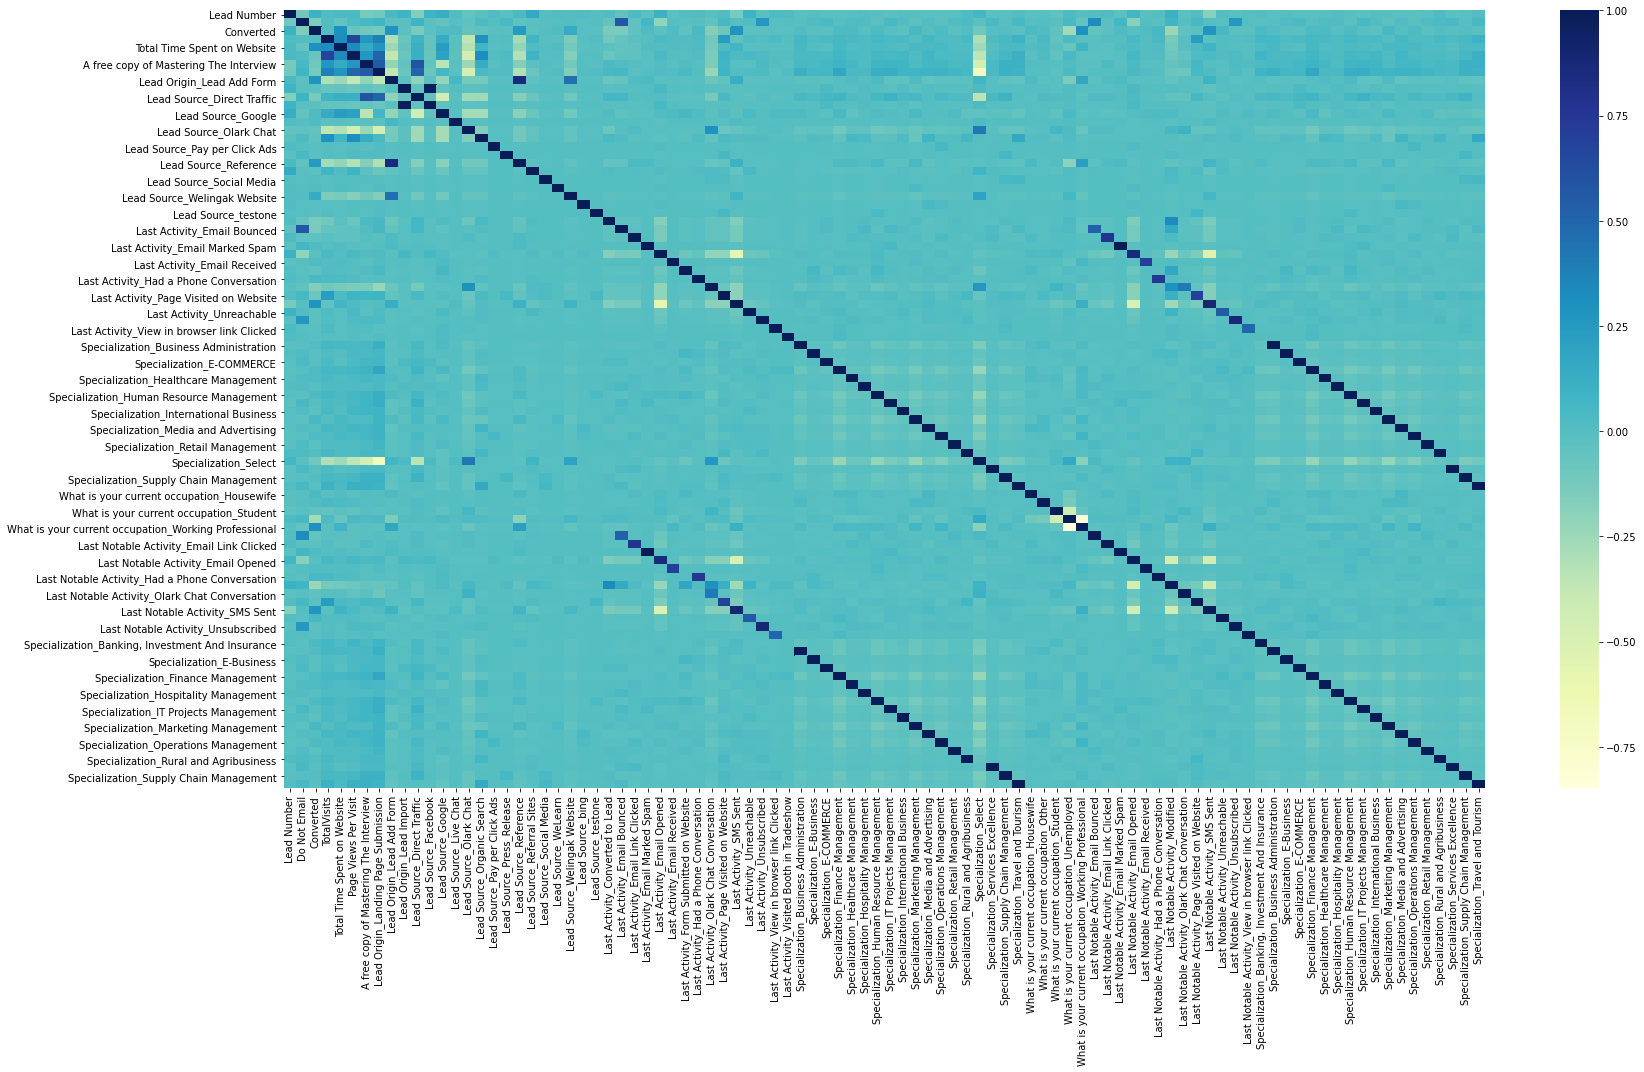

In [48]:
#Heatmap
plt.figure(figsize=[25,15])
sns.heatmap(lead.corr(), cmap='YlGnBu')
plt.tight_layout()
plt.show()

**OBSERVATION**

Since the number of variables are too high to inspect from a heatmap, we'll check the correlations manually.

In [49]:
#Negatively highly correlated values
lead.corr().unstack().sort_values().drop_duplicates().head()

What is your current occupation_Unemployed  What is your current occupation_Working Professional   -0.848996
Lead Origin_Landing Page Submission         Specialization_Select                                  -0.688526
Last Activity_Email Opened                  Last Activity_SMS Sent                                 -0.572559
Last Notable Activity_SMS Sent              Last Activity_Email Opened                             -0.509916
Last Activity_SMS Sent                      Last Notable Activity_Email Opened                     -0.495946
dtype: float64

In [50]:
#Positively highly correlated values
lead.corr().unstack().sort_values().drop_duplicates().tail(10)

Last Notable Activity_Page Visited on Website   Last Activity_Page Visited on Website       0.693902
Last Activity_Email Received                    Last Notable Activity_Email Received        0.707051
Last Notable Activity_Had a Phone Conversation  Last Activity_Had a Phone Conversation      0.751218
Last Activity_Email Link Clicked                Last Notable Activity_Email Link Clicked    0.781836
Lead Origin_Lead Add Form                       Lead Source_Reference                       0.862980
Last Activity_Email Opened                      Last Notable Activity_Email Opened          0.866192
Last Notable Activity_Unsubscribed              Last Activity_Unsubscribed                  0.879716
Last Notable Activity_SMS Sent                  Last Activity_SMS Sent                      0.890591
Lead Origin_Lead Import                         Lead Source_Facebook                        0.981903
Specialization_Travel and Tourism               Specialization_Travel and Tourism          

**OBSERVATION**

The following columns which has high correlation values with other features are removed

- What is your current occupation_Unemployed
- Lead Origin_Lead Import
- Last Notable Activity_SMS Sent
- Last Activity_Unsubscribed 
- Last Notable Activity_Email Opened
- Lead Origin_Lead Add Form 

#### Dropping Highly correlated dummy variables


In [51]:
X_test = X_test.drop(['What is your current occupation_Unemployed','Lead Origin_Lead Import', 'Last Notable Activity_SMS Sent',
                      'Last Activity_Unsubscribed','Last Notable Activity_Email Opened','Lead Origin_Lead Add Form'], 1)
X_train = X_train.drop(['What is your current occupation_Unemployed','Lead Origin_Lead Import', 'Last Notable Activity_SMS Sent',
                      'Last Activity_Unsubscribed','Last Notable Activity_Email Opened','Lead Origin_Lead Add Form'], 1)






### Model Building

In [52]:
#import Logistic regression
from sklearn.linear_model import LogisticRegression

In [53]:
logreg=LogisticRegression()

#### Feature Selection using RFE

In [54]:
#import RFE
from sklearn.feature_selection import RFE

#Chosing top 15 variables
rfe= RFE(logreg,15)
rfe= rfe.fit(X_train, y_train)

In [55]:
#RFE ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 12),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 13),
 ('Lead Source_Olark Chat', False, 56),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 26),
 ('Lead Source_Press_Release', False, 49),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 69),
 ('Lead Source_WeLearn', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 14),
 ('Lead Source_testone', False, 17),
 ('Last Activity_Converted to Lead', False, 19),
 ('Last Activity_Email Bounced', False, 10),
 ('Last Activity_Email Link Clicked', False, 44),
 ('Last Activit

In [56]:
#Loading the top 15 columns
col = X_train.columns[rfe.support_]
X_train = X_train[col]

#### Using Statsmodel to obtain detailed statistics report and conduct feature selection

In [57]:
#import Statsmodel
import statsmodels.api as sm

#### Model 1

In [58]:
#Defining function for Generalized Linear Model
def GLM_mod(X_train):
  X_train_sm = sm.add_constant(X_train)
  logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
  res = logm.fit()
  return res


In [59]:
#Model 1
logm1= GLM_mod(X_train)
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2062.8
Date:                Mon, 23 Nov 2020   Deviance:                       4125.7
Time:                        15:07:59   Pearson chi2:                 4.77e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9035      0.092     -9.795      0.000      -1.084      -0.723
Do Not Email                                            -1.4339      0.194     -7.401      0.000      -1.814      -1.054
TotalVisits                                              1.3749      0.246      5.579      0.000       0.892       1.858
Total Time Spent on Website                              4.3869      0.187     23.517      0.000       4.021       4.753
Lead Source_Direct Traffic                              -1.7953      0.138    -13.021      0.000      -2.065      -1.525
Lead Source_Google                                      -1.3364      0.134     -9.988      0.000      -1.599      -1.074
Lead Source_Organic Search                              -1.6164      0.163     -9.940      0.000      -1.935      -1.298
Lead Source_Reference                                    2.8143      0.265     10.623      0.000       2.295       3.334
Lead Source_Referral Sites                              -1.6651      0.377     -4.412      0.000      -2.405      -0.925
Lead Source_Welingak Website                             4.9110      1.012      4.855      0.000       2.928       6.894
Last Activity_Had a Phone Conversation                   1.1161      0.992      1.125      0.261      -0.828       3.060
Last Activity_SMS Sent                                   1.1837      0.083     14.333      0.000       1.022       1.346
What is your current occupation_Housewife               24.0111   2.43e+04      0.001      0.999   -4.76e+04    4.77e+04
What is your current occupation_Working Professional     2.5826      0.197     13.114      0.000       2.197       2.969
Last Notable Activity_Had a Phone Conversation          22.9159   2.09e+04      0.001      0.999   -4.09e+04     4.1e+04
Last Notable Activity_Unreachable                        2.7819      0.811      3.429      0.001       1.192       4.372
========================================================================================================================
"""

In [60]:
#import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
#Defining function for VIF
def vif_table(X_train):
    vif = pd.DataFrame()
    X=X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return vif
    

In [62]:
#Model 1 VIF
vif_table(X_train)

,Features,VIF
1,TotalVisits,3.04
2,Total Time Spent on Website,2.45
9,Last Activity_Had a Phone Conversation,2.45
13,Last Notable Activity_Had a Phone Conversation,2.44
4,Lead Source_Google,2.35
3,Lead Source_Direct Traffic,2.09
5,Lead Source_Organic Search,1.87
10,Last Activity_SMS Sent,1.52
12,What is your current occupation_Working Profes...,1.21
6,Lead Source_Reference,1.17


**OBSERVATION**
'What is your current occupation_Housewife' and 'Last Notable Activity_Had a Phone Conversation' has very high p values. Remove one of these and inspect further.

#### Model 2


In [63]:
#Dropping 'What is your current occupation_Housewife' variable due to high p value.
X_train.drop('What is your current occupation_Housewife',axis=1, inplace=True)

In [64]:
#Model 2
logm2= GLM_mod(X_train)
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.4
Date:                Mon, 23 Nov 2020   Deviance:                       4138.9
Time:                        15:08:00   Pearson chi2:                 4.79e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9000      0.092     -9.764      0.000      -1.081      -0.719
Do Not Email                                            -1.4382      0.194     -7.428      0.000      -1.818      -1.059
TotalVisits                                              1.3533      0.246      5.498      0.000       0.871       1.836
Total Time Spent on Website                              4.3862      0.186     23.547      0.000       4.021       4.751
Lead Source_Direct Traffic                              -1.7858      0.138    -12.976      0.000      -2.056      -1.516
Lead Source_Google                                      -1.3248      0.134     -9.920      0.000      -1.586      -1.063
Lead Source_Organic Search                              -1.5958      0.162     -9.839      0.000      -1.914      -1.278
Lead Source_Reference                                    2.8300      0.265     10.691      0.000       2.311       3.349
Lead Source_Referral Sites                              -1.6595      0.377     -4.399      0.000      -2.399      -0.920
Lead Source_Welingak Website                             4.9121      1.012      4.856      0.000       2.929       6.895
Last Activity_Had a Phone Conversation                   1.1041      0.991      1.114      0.265      -0.839       3.047
Last Activity_SMS Sent                                   1.1746      0.082     14.239      0.000       1.013       1.336
What is your current occupation_Working Professional     2.5757      0.197     13.084      0.000       2.190       2.962
Last Notable Activity_Had a Phone Conversation          21.9213   1.27e+04      0.002      0.999   -2.48e+04    2.48e+04
Last Notable Activity_Unreachable                        2.7723      0.811      3.417      0.001       1.182       4.362
========================================================================================================================
"""

In [65]:
#Model 2 VIF
vif_table(X_train)

,Features,VIF
1,TotalVisits,3.04
2,Total Time Spent on Website,2.45
9,Last Activity_Had a Phone Conversation,2.45
12,Last Notable Activity_Had a Phone Conversation,2.44
4,Lead Source_Google,2.35
3,Lead Source_Direct Traffic,2.09
5,Lead Source_Organic Search,1.86
10,Last Activity_SMS Sent,1.52
11,What is your current occupation_Working Profes...,1.21
6,Lead Source_Reference,1.17


#### Model 3

In [66]:
#Dropping 'Last Notable Activity_Had a Phone Conversation' variable due to high p value.
X_train.drop('Last Notable Activity_Had a Phone Conversation',axis=1, inplace=True)

In [67]:
#Model 3
logm3= GLM_mod(X_train)
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.9
Date:                Mon, 23 Nov 2020   Deviance:                       4143.8
Time:                        15:08:00   Pearson chi2:                 4.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9002      0.092     -9.766      0.000      -1.081      -0.720
Do Not Email                                            -1.4380      0.194     -7.427      0.000      -1.817      -1.059
TotalVisits                                              1.3700      0.246      5.576      0.000       0.888       1.852
Total Time Spent on Website                              4.3784      0.186     23.521      0.000       4.014       4.743
Lead Source_Direct Traffic                              -1.7879      0.138    -12.990      0.000      -2.058      -1.518
Lead Source_Google                                      -1.3227      0.133     -9.913      0.000      -1.584      -1.061
Lead Source_Organic Search                              -1.6047      0.162     -9.893      0.000      -1.923      -1.287
Lead Source_Reference                                    2.8302      0.265     10.691      0.000       2.311       3.349
Lead Source_Referral Sites                              -1.6766      0.379     -4.420      0.000      -2.420      -0.933
Lead Source_Welingak Website                             4.9121      1.012      4.856      0.000       2.929       6.895
Last Activity_Had a Phone Conversation                   2.6409      0.803      3.290      0.001       1.068       4.214
Last Activity_SMS Sent                                   1.1748      0.082     14.243      0.000       1.013       1.336
What is your current occupation_Working Professional     2.5735      0.197     13.070      0.000       2.188       2.959
Last Notable Activity_Unreachable                        2.7709      0.811      3.415      0.001       1.181       4.361
========================================================================================================================
"""

In [68]:
#Model 3 VIF
vif_table(X_train)

,Features,VIF
1,TotalVisits,3.03
2,Total Time Spent on Website,2.45
4,Lead Source_Google,2.35
3,Lead Source_Direct Traffic,2.09
5,Lead Source_Organic Search,1.86
10,Last Activity_SMS Sent,1.52
11,What is your current occupation_Working Profes...,1.21
6,Lead Source_Reference,1.17
0,Do Not Email,1.09
7,Lead Source_Referral Sites,1.06


**OBSERVATION**
This model has all the p values and vif within permissible range.

#### Probability Prediction

In [69]:
#Add constant
y_train_pred = logm3.predict(sm.add_constant(X_train))

In [70]:
#Display
y_train_pred[:10]

8003    0.253564
218     0.116785
4171    0.110951
4037    0.289008
3660    0.957091
207     0.192414
2044    0.204935
6411    0.961332
6498    0.051470
2085    0.982223
dtype: float64

In [71]:
#Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25356385, 0.11678507, 0.11095102, 0.28900753, 0.95709105,
       0.19241369, 0.20493492, 0.96133159, 0.05147045, 0.98222289])

In [72]:
#Create a Data Frame with 'Converted' Column and Conversion Probability based on our final model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.253564
1,0,0.116785
2,1,0.110951
3,1,0.289008
4,1,0.957091


In [73]:
#Predicting the Conversion based on the probability
# probability value greater than 0.5 is chosen to assign a positive lead conversion
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.253564,0
1,0,0.116785,0
2,1,0.110951,0
3,1,0.289008,0
4,1,0.957091,1


#### Confusion matrix

In [74]:
#import metrics
from sklearn import metrics

In [75]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1919  393]
 [ 555 1594]]


In [76]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7874915938130465


In [77]:
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives
TP = confusion[1,1] # True Positive 


In [78]:
#Sensitivity
TP/(TP+FN)

0.7417403443462075

In [79]:
#Specificity
TN/(TN+FP)

0.8300173010380623

**OBSERVATION**

- Accuracy=78%
- Sensitivity=74%
- Specificity=83%

These are fairly good values. Let us now optimize these values further by chosing an optimal cut off value.

#### ROC Curve

In [80]:
#defining function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

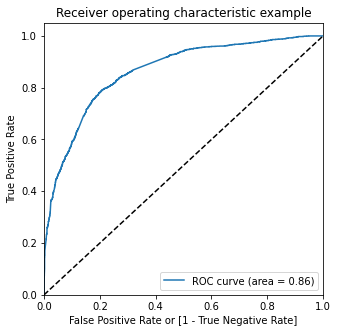

In [82]:
#plot
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**OBSERVATION**

The curve shows the tradeoff between Sensitivity and Specificity.
The Area under the curve is 0.86 and the ROC curve is closer to the left and top borders which means that our test is quite accurate.

#### Optimal Cut-off point

To find the optimal cut off point, prediction is made for a range of probability values to compare the accuracy, sensitivity and specificity.

In [83]:
# probabilty from 0.0 to 0.9
numbers = [float(x)/10 for x in range(10)]
#mapping the prediction based on the probability values
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
#head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.253564,0,1,1,1,0,0,0,0,0,0,0
1,0,0.116785,0,1,1,0,0,0,0,0,0,0,0
2,1,0.110951,0,1,1,0,0,0,0,0,0,0,0
3,1,0.289008,0,1,1,1,0,0,0,0,0,0,0
4,1,0.957091,1,1,1,1,1,1,1,1,1,1,1


In [84]:
#Accuracy, Sensitivity and Specificity
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.547187  0.989763  0.135813
0.2   0.2  0.694239  0.952536  0.454152
0.3   0.3  0.771800  0.862727  0.687284
0.4   0.4  0.786595  0.801768  0.772491
0.5   0.5  0.787492  0.741740  0.830017
0.6   0.6  0.759471  0.624477  0.884948
0.7   0.7  0.737503  0.544439  0.916955
0.8   0.8  0.713965  0.458353  0.951557
0.9   0.9  0.645595  0.280596  0.984862


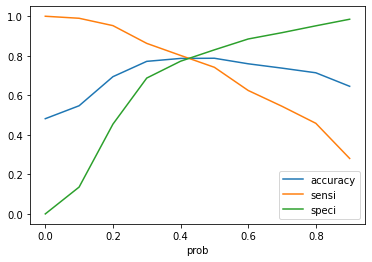

In [85]:
#Plotting Accuracy, Sensitivity and Specificity
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi','speci'])
plt.show()

**0.42** seems to be an optimal cut off from the above plot

In [86]:
#Final prediction with 0.42 as Cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.253564,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.116785,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.110951,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.289008,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.957091,1,1,1,1,1,1,1,1,1,1,1,1


In [87]:
#Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [88]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1828,  484],
       [ 449, 1700]])

In [89]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [90]:
# Calculate Sensitivity

TP/(TP+FN)

0.7910656119125175

In [91]:
# Calculate Specificity
TN/(TN+FP)

0.7906574394463668

**OBSERVATION**

Revised Metrics:

- Accuracy=79%
- Sensitivity=79%
- Specificity=79%


### Making Predictions on the test dataset

####Scaling Test data

In [92]:
#Scaling the numeric values using transform
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit', 'Total Time Spent on Website']])

In [93]:
# Filterning the columns obtained using RFE

X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0,0.000000,0.000000,0,0,0,1,0,0,0,1,0,1,0,0
6122,0,0.388889,0.029049,1,0,0,0,0,0,0,0,0,0,0,0
9202,0,0.222222,0.416813,0,1,0,0,0,0,0,1,0,0,0,0
6570,1,0.166667,0.378961,1,0,0,0,0,0,0,1,0,0,0,0
2668,0,0.444444,0.395246,0,0,1,0,0,0,0,1,0,0,0,0


In [94]:
#Add constant
X_test_sm = sm.add_constant(X_test[col])

In [95]:
#Dropping the features removed during feature selection 
X_test.drop([ 'What is your current occupation_Housewife', 
              'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [96]:
#Predictions on the test dataset
y_test_pred = logm3.predict(sm.add_constant(X_test))

In [97]:
y_test_pred[:10]

4771    0.996592
6122    0.116287
9202    0.746743
6570    0.256611
2668    0.732899
4233    0.803782
3368    0.734303
9091    0.560395
5972    0.226858
3631    0.746791
dtype: float64

In [98]:
#Creating a df with test prediction values
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [99]:
y_pred_final.head()

,Converted,0
0,1,0.996592
1,0,0.116287
2,0,0.746743
3,1,0.256611
4,1,0.732899


In [100]:
#renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [101]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996592
1,0,0.116287
2,0,0.746743
3,1,0.256611
4,1,0.732899


In [102]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [103]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996592,1
1,0,0.116287,0
2,0,0.746743,1
3,1,0.256611,0
4,1,0.732899,1


#### Confusion Matrix

In [104]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[784, 212],
       [194, 722]])

In [105]:
#Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7876569037656904

In [106]:
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
TP = confusion2[1,1] # true positive 

In [107]:
# Sensitivity
TP / float(TP+FN)

0.7882096069868996

In [108]:
# Calculate specificity
TN / float(TN+FP)

0.7871485943775101

**OBSERVATION**

Metrics observed on the test dataset

- Accuracy=78.7%
- Sensitivity=78.8%
- Specificity=78.7%

These are very similiar values we got from the train dataset, thus our model seems to be performing well.

### Lead Score Final DataFrame

*Every lead is assigned a score out of 100. A score above 42 for a person would mean that he/she is a hot lead. The score is predicted on the test dataset based on our training model.*

In [109]:
# Initialising new column 'Lead Score'
y_pred_final['Lead Score']=round(y_pred_final.Conversion_Prob*100,0)

y_pred_final.index=y_test.index


In [110]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead Score
4771,1,0.996592,1,100.0
6122,0,0.116287,0,12.0
9202,0,0.746743,1,75.0
6570,1,0.256611,0,26.0
2668,1,0.732899,1,73.0


In [111]:
#Merging with Lead ID in the original dataframe to identify hot leads
LeadScore = lead[['Lead Number']].merge(y_pred_final, left_index=True, right_index=True)

In [112]:
#Lead score dataset
LeadScore=LeadScore[['Lead Number','Lead Score','final_predicted']].reset_index(drop=True)
LeadScore.head()

,Lead Number,Lead Score,final_predicted
0,660728,30.0,0
1,660553,4.0,0
2,660479,15.0,0
3,660478,23.0,0
4,660424,68.0,1


### Top Features

In [113]:
#Model 3 parameters
logm3.params

const                                                  -0.900209
Do Not Email                                           -1.437993
TotalVisits                                             1.370042
Total Time Spent on Website                             4.378436
Lead Source_Direct Traffic                             -1.787851
Lead Source_Google                                     -1.322714
Lead Source_Organic Search                             -1.604672
Lead Source_Reference                                   2.830233
Lead Source_Referral Sites                             -1.676567
Lead Source_Welingak Website                            4.912116
Last Activity_Had a Phone Conversation                  2.640942
Last Activity_SMS Sent                                  1.174794
What is your current occupation_Working Professional    2.573511
Last Notable Activity_Unreachable                       2.770880
dtype: float64

**The top 3 features from the above list are:**
- Lead Source_Welingak Website 
- Total Time Spent on Website
- Lead Source_Reference

**FINAL LEARNINGS**

- Leads that come through Reference and Welingak websites are strong indicators of Hot leads. Such leads should be followed up specially.
- Leads who spend more time on the X Edu company's portal tend to be more interested and curious about the course and are highly likely to be a hot lead. The Sales team should focus on them and can give them more insights about the course.
- The leads having a score greater than 42 should be considered as hot leads.
- Providing incentives and bonus offers for hot leads can increase their probability of conversion.  
- Working Professional have higher chance of being a lead than unemployed people.


***